# Import package

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [2]:
file='./Data/NBA_data.csv'
NBA_dat=pd.read_csv(file)

In [3]:
NBA_dat.head()

,Season,Team,Conference,Season record,Conf. Seed,NBA Seed,Last 20 Games record,ORtg Rank,DRtg Rank,2 seasons ago result,Last season result,Playoff Outcome
0,2024-2025,Cleveland Cavaliers,East,0.780,1,2,0.60,1,8,First Round,Conference Semi-Final,Conference Semi-Final
1,2024-2025,Boston Celtics,East,0.744,2,3,0.85,2,5,Conference Final,NBA Champion,Conference Semi-Final
2,2024-2025,New York Knicks,East,0.622,3,5,0.55,5,13,Conference Semi-Final,Conference Semi-Final,Conference Final
3,2024-2025,Indiana Pacers,East,0.610,4,7,0.75,9,14,No Playoff,Conference Final,NBA Final
4,2024-2025,Milwaukee Bucks,East,0.585,5,13,0.60,11,12,First Round,First Round,First Round


# Explorative Data Analysis

In [4]:
#Choose the NBA Champion
NBA_champ_dat=NBA_dat[NBA_dat['Playoff Outcome'] == 'NBA Champion']

In [5]:
desired_order = ['No Playoff','First Round','Conference Semi-Final','Conference Final','NBA Final','NBA Champion']

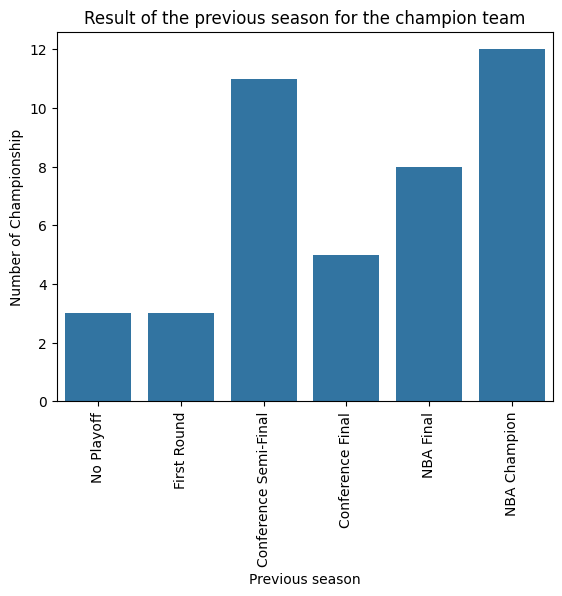

In [10]:
# Influence of the previous season
sns.countplot(data=NBA_champ_dat, x='Last season result',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the previous season for the champion team")
plt.xlabel('Previous season')
plt.ylabel('Number of Championship')
plt.show()

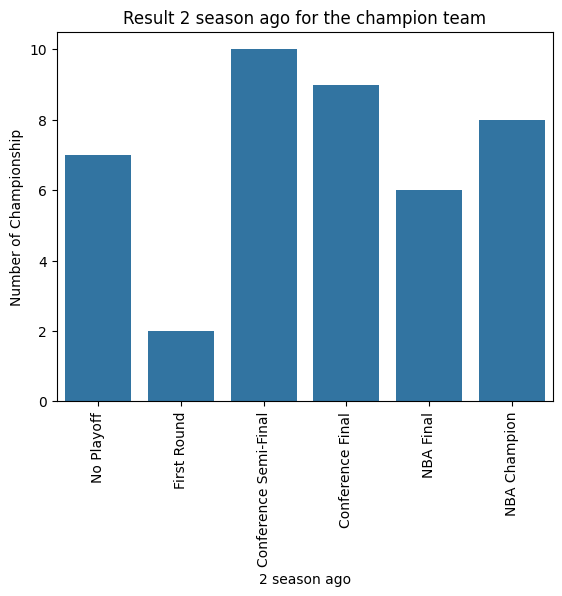

In [11]:
# Influence of the previous previous  season
sns.countplot(data=NBA_champ_dat, x='2 seasons ago result',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result 2 season ago for the champion team")
plt.xlabel('2 season ago')
plt.ylabel('Number of Championship')
plt.show()

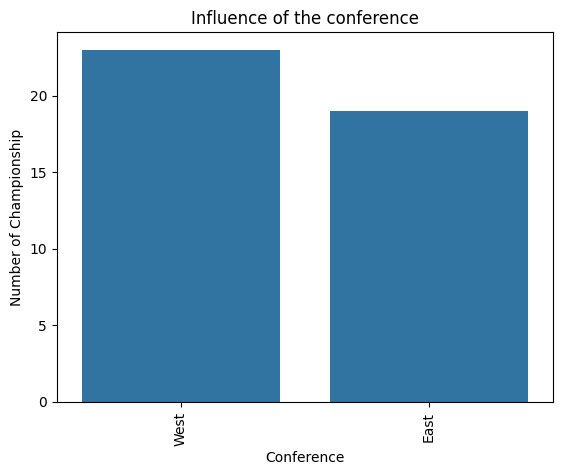

In [12]:
# Influence of the conference
sns.countplot(data=NBA_champ_dat, x='Conference')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Influence of the conference")
plt.xlabel('Conference')
plt.ylabel('Number of Championship')
plt.show()

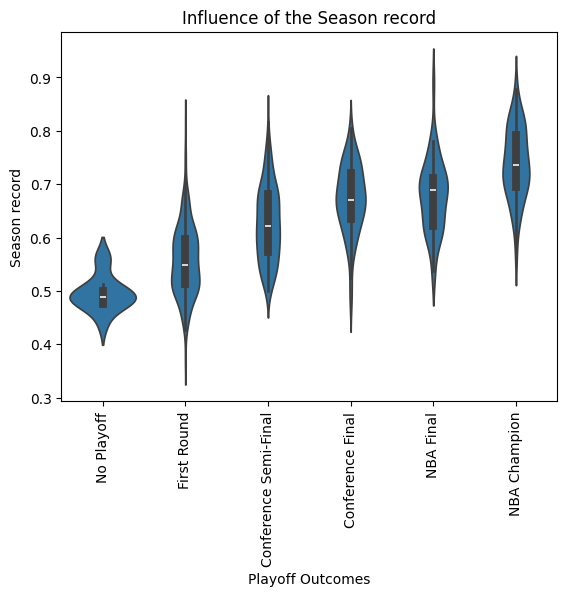

In [13]:
# Influence of the season record 
sns.violinplot(data=NBA_dat, x='Playoff Outcome',y='Season record',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Influence of the Season record")
plt.xlabel('Playoff Outcomes')
plt.ylabel('Season record')
plt.show()

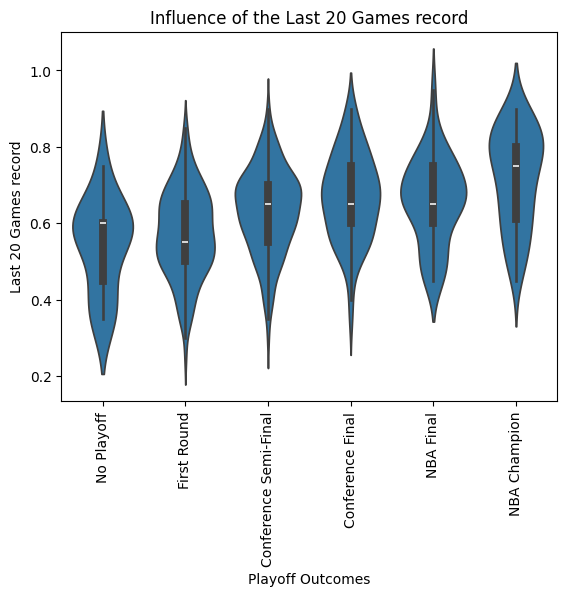

In [14]:
# Influence of the last 20 game record 
sns.violinplot(data=NBA_dat, x='Playoff Outcome',y='Last 20 Games record',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Influence of the Last 20 Games record")
plt.xlabel('Playoff Outcomes')
plt.ylabel('Last 20 Games record')
plt.show()

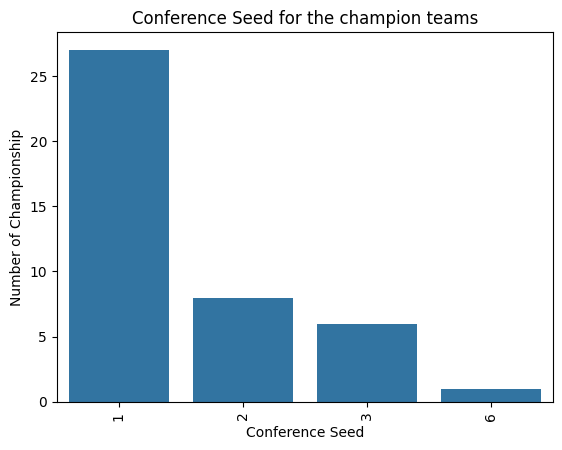

In [15]:
# Influence of the Conf seed
sns.countplot(data=NBA_champ_dat, x='Conf. Seed')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Conference Seed for the champion teams")
plt.xlabel('Conference Seed')
plt.ylabel('Number of Championship')
plt.show()

In [17]:
# Percentage of champions that were top 3 in their conference
num_season = NBA_champ_dat.shape[0]
num_top3_confseed=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['Conf. Seed'].isin( [1,2,3]))].shape[0]
perc_top3_confseed=num_top3_confseed/num_season *100
perc_top3_confseed

97.61904761904762

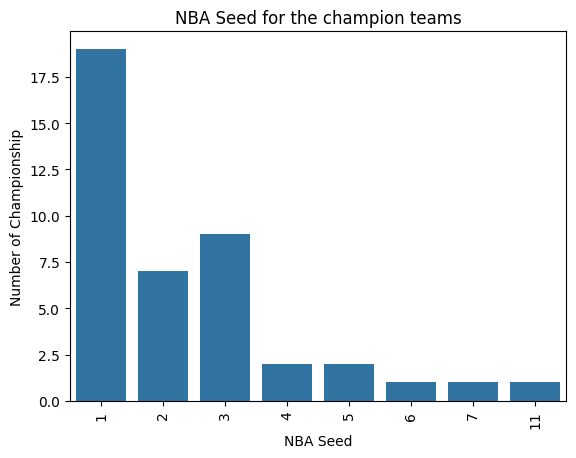

In [18]:
# Influence of the NBA seed
sns.countplot(data=NBA_champ_dat, x='NBA Seed')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("NBA Seed for the champion teams")
plt.xlabel('NBA Seed')
plt.ylabel('Number of Championship')
plt.show()

In [19]:
# Percentage of champions that were top 3 NBA
num_top3_nbaseed=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['NBA Seed'].isin( [1,2,3]))].shape[0]
perc_top3_nbaseed=num_top3_nbaseed/num_season *100
perc_top3_nbaseed

83.33333333333334

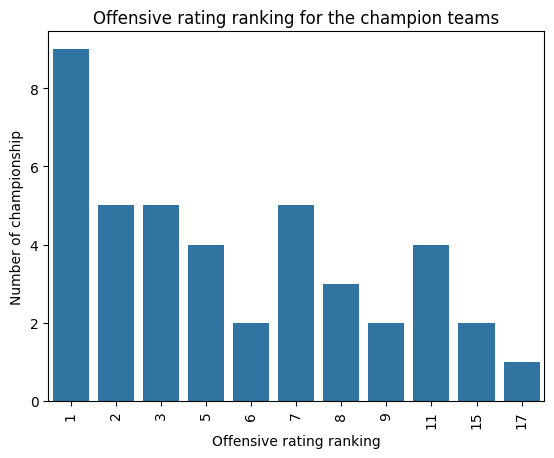

In [20]:
# Influence of the offensive rating ranking
sns.countplot(data=NBA_champ_dat, x='ORtg Rank')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Offensive rating ranking for the champion teams")
plt.xlabel('Offensive rating ranking')
plt.ylabel('Number of championship')
plt.show()

In [21]:
# Percentage of champions that were top 5 attack
num_top5_off=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['ORtg Rank'].isin( [1,2,3,4,5]))].shape[0]
perc_top5_off=num_top5_off/num_season *100
perc_top5_off

54.761904761904766

In [22]:
# Percentage of champions that were top 10 attack
num_top10_off=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['ORtg Rank'].isin( [1,2,3,4,5,6,7,8,9,10]))].shape[0]
perc_top10_off=num_top10_off/num_season *100
perc_top10_off

83.33333333333334

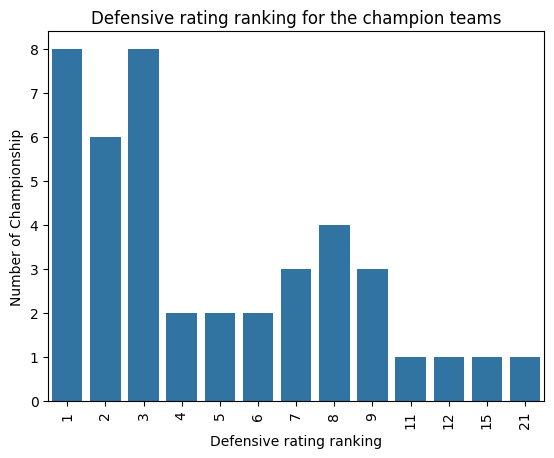

In [23]:
# Influence of the defensive rating ranking
sns.countplot(data=NBA_champ_dat, x='DRtg Rank')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Defensive rating ranking for the champion teams")
plt.xlabel('Defensive rating ranking')
plt.ylabel('Number of Championship')
plt.show()

In [24]:
# Percentage of champions that were top 5 defense
num_top5_def=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['DRtg Rank'].isin( [1,2,3,4,5]))].shape[0]
perc_top5_def=num_top5_def/num_season *100
perc_top5_def

61.904761904761905

In [25]:
# Percentage of champions that were top 10 defense
num_top10_def=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['DRtg Rank'].isin( [1,2,3,4,5,6,7,8,9,10]))].shape[0]
perc_top10_def=num_top10_def/num_season *100
perc_top10_def

90.47619047619048

In [26]:
# Percentage of champions that were top 10 attack and top 10 defense
num_top10_od=NBA_dat[(NBA_dat['Playoff Outcome'] == 'NBA Champion')&(NBA_dat['ORtg Rank'].isin( [1,2,3,4,5,6,7,8,9,10]))&(NBA_dat['DRtg Rank'].isin( [1,2,3,4,5,6,7,8,9,10]))].shape[0]
perc_top10_od=num_top10_od/num_season *100
perc_top10_od

73.80952380952381

What are the results of the first NBA Seed?

In [27]:
First_seed_dat=NBA_dat[NBA_dat['NBA Seed'] == 1]

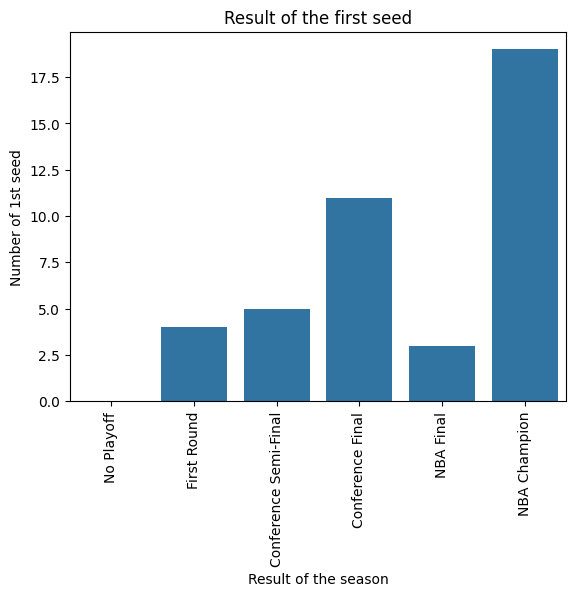

In [28]:
# Result of the first NBA Seed
sns.countplot(data=First_seed_dat, x='Playoff Outcome',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the first seed")
plt.xlabel('Result of the season')
plt.ylabel('Number of 1st seed')
plt.show()

What are the results of the first Conference Seed?

In [30]:
First_conf_seed_dat=NBA_dat[NBA_dat['Conf. Seed'] == 1]

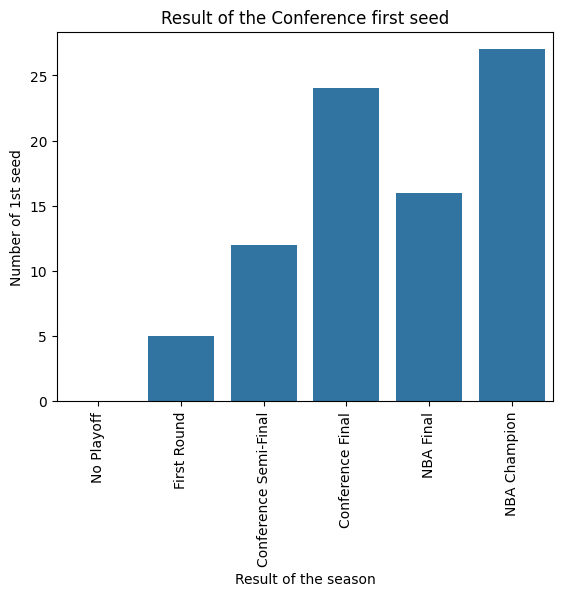

In [31]:
# Result of the first Conf Seed
sns.countplot(data=First_conf_seed_dat, x='Playoff Outcome',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the Conference first seed")
plt.xlabel('Result of the season')
plt.ylabel('Number of 1st seed')
plt.show()

In [32]:
# Result of the West first seed
First_west_conf_seed_dat=NBA_dat[(NBA_dat['Conf. Seed'] == 1) & (NBA_dat['Conference'] == 'West')]

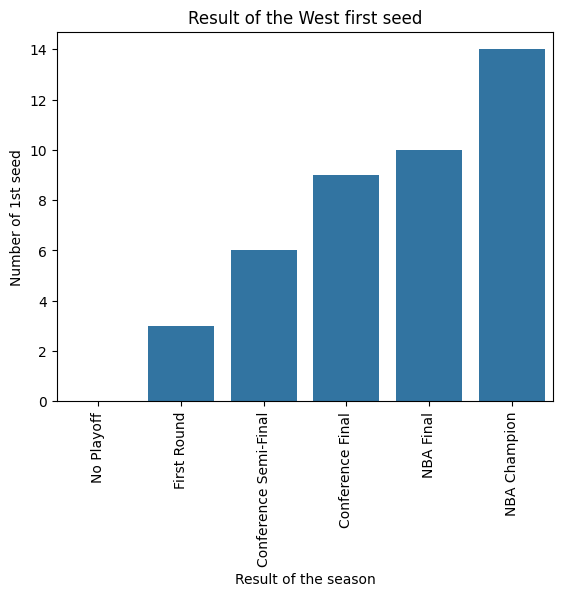

In [33]:
sns.countplot(data=First_west_conf_seed_dat, x='Playoff Outcome',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the West first seed")
plt.xlabel('Result of the season')
plt.ylabel('Number of 1st seed')
plt.show()

In [34]:
# Result of the East first seed
First_east_conf_seed_dat=NBA_dat[(NBA_dat['Conf. Seed'] == 1) & (NBA_dat['Conference'] == 'East')]

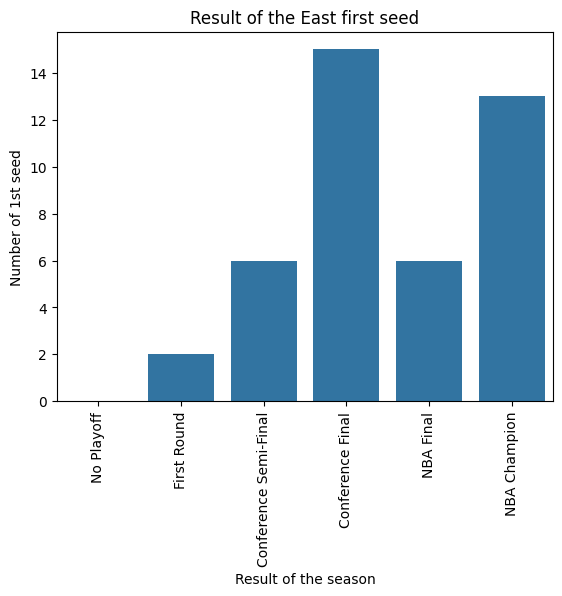

In [35]:
sns.countplot(data=First_east_conf_seed_dat, x='Playoff Outcome',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the East first seed")
plt.xlabel('Result of the season')
plt.ylabel('Number of 1st seed')
plt.show()

What is the result of the contending champion?

In [36]:
# Result of the Champion in previous year
Prec_champ_dat=NBA_dat[(NBA_dat['Last season result'] == 'NBA Champion')]

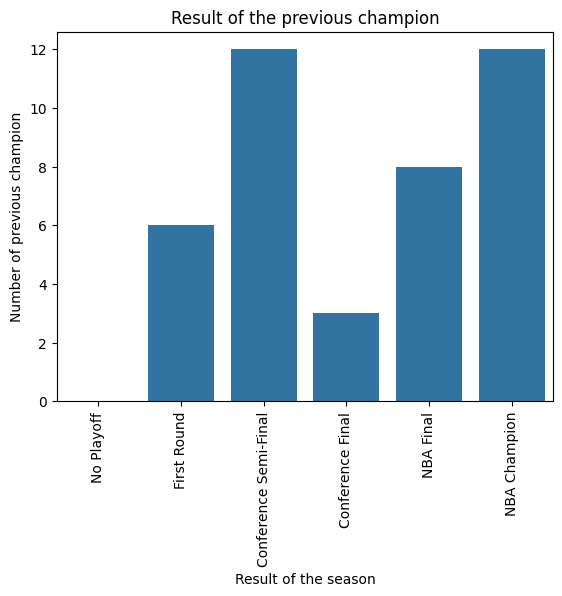

In [37]:
sns.countplot(data=Prec_champ_dat, x='Playoff Outcome',order=desired_order)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Result of the previous champion")
plt.xlabel('Result of the season')
plt.ylabel('Number of previous champion')
plt.show()

In [38]:
# Percentage to go to the final for the previous champion
num_fin=NBA_dat[(NBA_dat['Last season result'] == 'NBA Champion')&(NBA_dat['Playoff Outcome'].isin( ['NBA Champion','NBA Final']))].shape[0]
perc_fin=num_fin/num_season *100
perc_fin

47.61904761904761

# Mapping for the results of 2 year ago, last year and this year

In [4]:
NBA_ml=NBA_dat.copy()

In [5]:
print(NBA_dat['2 seasons ago result'].unique())

['First Round' 'Conference Final' 'Conference Semi-Final' 'No Playoff'
 'NBA Final' 'NBA Champion']


In [6]:
print(NBA_dat['Last season result'].unique())

['Conference Semi-Final' 'NBA Champion' 'Conference Final' 'First Round'
 'No Playoff' 'NBA Final']


In [7]:
print(NBA_dat['Playoff Outcome'].unique())

['Conference Semi-Final' 'Conference Final' 'NBA Final' 'First Round'
 'No Playoff' 'NBA Champion']


In [8]:
# Define the mapping
result_mapping = {
    'No Playoff': 0,
    'First Round': 1/16,
    'Conference Semi-Final': 1/8,
    'Conference Final': 1/4,
    'NBA Final': 1/2,
    'NBA Champion': 1
}

In [9]:
# Apply the mapping to the column
NBA_ml['2 seasons ago result (numeric)'] = NBA_ml['2 seasons ago result'].map(result_mapping)

In [10]:
print(NBA_ml['2 seasons ago result (numeric)'].unique())

[0.0625 0.25   0.125  0.     0.5    1.    ]


In [11]:
# Apply the mapping to the column last season
NBA_ml['Last season result (numeric)'] = NBA_ml['Last season result'].map(result_mapping)

In [12]:
print(NBA_ml['Last season result (numeric)'].unique())

[0.125  1.     0.25   0.0625 0.     0.5   ]


In [13]:
# Apply the mapping to the column Playoff outcome
NBA_ml['Playoff Outcome (numeric)'] = NBA_ml['Playoff Outcome'].map(result_mapping)

In [14]:
print(NBA_ml['Playoff Outcome (numeric)'].unique())

[0.125  0.25   0.5    0.0625 0.     1.    ]


In [15]:
NBA_ml=NBA_ml.drop('2 seasons ago result',axis=1)

In [16]:
NBA_ml=NBA_ml.drop('Last season result',axis=1)

In [17]:
NBA_ml=NBA_ml.drop('Playoff Outcome',axis=1)

In [18]:
NBA_ml.head()

,Season,Team,Conference,Season record,Conf. Seed,NBA Seed,Last 20 Games record,ORtg Rank,DRtg Rank,2 seasons ago result (numeric),Last season result (numeric),Playoff Outcome (numeric)
0,2024-2025,Cleveland Cavaliers,East,0.780,1,2,0.60,1,8,0.0625,0.1250,0.1250
1,2024-2025,Boston Celtics,East,0.744,2,3,0.85,2,5,0.2500,1.0000,0.1250
2,2024-2025,New York Knicks,East,0.622,3,5,0.55,5,13,0.1250,0.1250,0.2500
3,2024-2025,Indiana Pacers,East,0.610,4,7,0.75,9,14,0.0000,0.2500,0.5000
4,2024-2025,Milwaukee Bucks,East,0.585,5,13,0.60,11,12,0.0625,0.0625,0.0625


# Encoding the Conferences

In [19]:
Conference_mapping ={
    'East': 0,
    'West': 1,
}

In [20]:
NBA_ml['Conference(encoded)'] = NBA_ml['Conference'].map(Conference_mapping)

In [21]:
print(NBA_ml['Conference(encoded)'].unique())

[0 1]


In [22]:
NBA_ml = NBA_ml.drop(columns='Conference')

In [23]:
NBA_ml.head()

,Season,Team,Season record,Conf. Seed,NBA Seed,Last 20 Games record,ORtg Rank,DRtg Rank,2 seasons ago result (numeric),Last season result (numeric),Playoff Outcome (numeric),Conference(encoded)
0,2024-2025,Cleveland Cavaliers,0.780,1,2,0.60,1,8,0.0625,0.1250,0.1250,0
1,2024-2025,Boston Celtics,0.744,2,3,0.85,2,5,0.2500,1.0000,0.1250,0
2,2024-2025,New York Knicks,0.622,3,5,0.55,5,13,0.1250,0.1250,0.2500,0
3,2024-2025,Indiana Pacers,0.610,4,7,0.75,9,14,0.0000,0.2500,0.5000,0
4,2024-2025,Milwaukee Bucks,0.585,5,13,0.60,11,12,0.0625,0.0625,0.0625,0


# Encoding the seed and rank

In [24]:
col_scal=['Conf. Seed','NBA Seed','ORtg Rank','DRtg Rank']

In [25]:
# Initialize the scaler
Min_max_scal=MinMaxScaler()

In [26]:
NBA_ml[col_scal]=Min_max_scal.fit_transform(NBA_ml[col_scal])

In [27]:
NBA_ml.head()

,Season,Team,Season record,Conf. Seed,NBA Seed,Last 20 Games record,ORtg Rank,DRtg Rank,2 seasons ago result (numeric),Last season result (numeric),Playoff Outcome (numeric),Conference(encoded)
0,2024-2025,Cleveland Cavaliers,0.780,0.000000,0.05,0.60,0.000000,0.250000,0.0625,0.1250,0.1250,0
1,2024-2025,Boston Celtics,0.744,0.111111,0.10,0.85,0.037037,0.142857,0.2500,1.0000,0.1250,0
2,2024-2025,New York Knicks,0.622,0.222222,0.20,0.55,0.148148,0.428571,0.1250,0.1250,0.2500,0
3,2024-2025,Indiana Pacers,0.610,0.333333,0.30,0.75,0.296296,0.464286,0.0000,0.2500,0.5000,0
4,2024-2025,Milwaukee Bucks,0.585,0.444444,0.60,0.60,0.370370,0.392857,0.0625,0.0625,0.0625,0


# Drop the columns

In [28]:
NBA_ml = NBA_ml.drop(columns=['Season','Team'])

In [29]:
NBA_ml.head()

,Season record,Conf. Seed,NBA Seed,Last 20 Games record,ORtg Rank,DRtg Rank,2 seasons ago result (numeric),Last season result (numeric),Playoff Outcome (numeric),Conference(encoded)
0,0.780,0.000000,0.05,0.60,0.000000,0.250000,0.0625,0.1250,0.1250,0
1,0.744,0.111111,0.10,0.85,0.037037,0.142857,0.2500,1.0000,0.1250,0
2,0.622,0.222222,0.20,0.55,0.148148,0.428571,0.1250,0.1250,0.2500,0
3,0.610,0.333333,0.30,0.75,0.296296,0.464286,0.0000,0.2500,0.5000,0
4,0.585,0.444444,0.60,0.60,0.370370,0.392857,0.0625,0.0625,0.0625,0


# Analysis the correlation

In [30]:
corr=NBA_ml.corr()

In [31]:
corr['Playoff Outcome (numeric)'].sort_values(ascending=False)

Playoff Outcome (numeric)         1.000000
Season record                     0.551561
Last season result (numeric)      0.373100
Last 20 Games record              0.308774
2 seasons ago result (numeric)    0.290597
Conference(encoded)               0.013097
DRtg Rank                        -0.268674
ORtg Rank                        -0.286581
NBA Seed                         -0.516111
Conf. Seed                       -0.530304
Name: Playoff Outcome (numeric), dtype: float64

# Split between variable (X) and target (y)

In [32]:
X = NBA_ml.drop(columns='Playoff Outcome (numeric)')

In [33]:
y = NBA_ml [['Playoff Outcome (numeric)']]

# Split data between train, validation and test datasets

In [120]:
X_train, X_prov, y_train, y_prov = train_test_split(X,y,test_size=0.3,stratify=y)

In [121]:
X_val, X_test, y_val, y_test = train_test_split(X_prov, y_prov, test_size=0.5, stratify=y_prov)

In [122]:
X_train = X_train.values

In [123]:
X_val = X_val.values

In [124]:
X_test = X_test.values

In [125]:
y_train = y_train.values.ravel()

In [126]:
y_val = y_val.values.ravel()

In [127]:
y_test = y_test.values.ravel()

# Linear regression

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
model_linear = LinearRegression()

In [130]:
model_linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
y_train_pred = model_linear.predict(X_train)

In [132]:
y_val_pred = model_linear.predict(X_val)

In [133]:
 from sklearn.metrics import mean_squared_error

In [134]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

In [135]:
 rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [136]:
print(f'MSE train: {rmse_train:.2f}')
print(f'MSE val: {rmse_val:.2f}')

MSE train: 0.18
MSE val: 0.21


In [137]:
from sklearn.metrics import r2_score

In [138]:
train_r2 = r2_score(y_train, y_train_pred)

In [139]:
val_r2 = r2_score(y_val, y_val_pred)

In [140]:
print (f' R^2 train {train_r2}')
print (f' R^2 val {val_r2}')

 R^2 train 0.39110757971730126
 R^2 val 0.2057169565891076


# Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
#Initialize the model
rf=RandomForestRegressor(n_estimators = 200, max_depth=8, min_samples_leaf=5)

In [143]:
rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [144]:
y_train_pred_rf = rf.predict(X_train)

In [145]:
y_val_pred_rf = rf.predict(X_val)

In [146]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

In [147]:
 rmse_val_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

In [148]:
print(f'MSE train: {rmse_train_rf:.2f}')
print(f'MSE val: {rmse_val_rf:.2f}')

MSE train: 0.13
MSE val: 0.21


In [149]:
train_r2_rf = r2_score(y_train, y_train_pred_rf)

In [150]:
val_r2_rf = r2_score(y_val, y_val_pred_rf)

In [151]:
print (f' R^2 train {train_r2_rf}')
print (f' R^2 val {val_r2_rf}')

 R^2 train 0.6813881765688081
 R^2 val 0.17507722366796163


# Hyperparameter tunning

In [152]:
rf_model = RandomForestRegressor(random_state=42)

In [153]:
# 2. Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 8, 10, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [154]:
from sklearn.model_selection import GridSearchCV
# 3. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="r2",        # Use R^2 as evaluation metric
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPUs
    verbose=2
)

In [155]:
# 4. Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 8, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [156]:
# Convert CV results to DataFrame
grid_results = pd.DataFrame(grid_search.cv_results_)

In [157]:
grid_results = grid_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 
                             'mean_test_score', 'std_test_score', 'rank_test_score']]

In [158]:
sorted_grid_results = grid_results.sort_values(by="mean_test_score", ascending=False)

In [159]:
sorted_grid_results.head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score,rank_test_score
21,5,4,5,100,0.415689,0.075847,1
18,5,4,2,100,0.415689,0.075847,1
24,5,4,10,100,0.415012,0.078952,3
26,5,4,10,500,0.412143,0.084871,4
51,8,4,10,100,0.411478,0.078876,5


In [160]:
best_model = grid_search.best_estimator_

In [161]:
best_model_rf = best_model

In [162]:
# Check its parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


# XGBoost

In [163]:
from xgboost import XGBRegressor

In [164]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [165]:
#Parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}

In [166]:
# Grid Search CV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',   # R^2 metric
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [167]:
# Fit
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [168]:
grid_results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

In [172]:
sorted_grid_results = grid_results_xgb.sort_values(by="mean_test_score", ascending=False)

In [173]:
sorted_grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048387,0.004995,0.002573,0.000991,0.05,3,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.492106,0.363523,0.454047,0.295591,0.336498,0.388353,0.073472,1
1,0.024400,0.005451,0.001900,0.000313,0.05,3,100,1.0,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.518392,0.317128,0.432038,0.300253,0.339966,0.381556,0.082175,2
4,0.043649,0.007679,0.002250,0.000890,0.05,5,100,0.8,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.529756,0.145157,0.482671,0.301398,0.292177,0.350232,0.139700,3
3,0.034430,0.001446,0.001829,0.000153,0.05,3,200,1.0,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.450671,0.260743,0.431510,0.281830,0.310631,0.347077,0.078613,4
2,0.052987,0.008183,0.001960,0.000354,0.05,3,200,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.431608,0.265215,0.459050,0.275079,0.282635,0.342718,0.084411,5


In [174]:
best_model_xgb = grid_search_xgb.best_estimator_

In [175]:
# Check its parameters
print("Best parameters:", grid_search_xgb.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Random Forest is the best

# Combined the training and validation set and retraining of the best model

In [176]:
X_combined = np.vstack([X_train, X_val])  # Combine features
y_combined = np.concatenate([y_train, y_val])  # Combine targets

In [177]:
best_model_rf.fit(X_combined, y_combined)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [183]:
y_comb_pred_best = best_model_rf.predict(X_combined)

In [184]:
comb_r2_best = r2_score(y_combined, y_comb_pred_best)
print (f' R^2 comb {comb_r2_best}')

 R^2 comb 0.6343562568911387


# Testing the model

In [180]:
y_pred_test = best_model_rf.predict(X_test)

In [181]:
test_r2 = r2_score(y_test, y_pred_test)
print (f' R^2 comb {test_r2}')

 R^2 comb 0.4049532435515998
